# **Final Project**
#### Team: *Safety First*
##### Sarah, Eshwar, Tyler

## **Introduction**


   Our final project is to determine the best neighborhood in Pittsburgh. This is being found by using a formula we created to take in our different data and factors and then in return, spit out a 'grade' for the neighborhood. 
### The Metrics
   The grade is determined by two factors, safety and beauty. These are further broken down into smaller areas of data, such as number of arrests, police reports, and firearm seizures. As well as number of 'smart trashcans' and number of organizations that contribute to 'beautifying the burgh.' 
    
   These numbers are put into a formula where we find averages and create an overall weight to each factor, then give each neighborhood a 'score' based on how many safety incidents they have and how many beautifying programs they have.
## The Data
   The data sets used:
   <ul>
    <li>https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh </li>
    <li>https://data.wprdc.org/dataset/police-incident-blotter </li>
    <li>https://data.wprdc.org/dataset/pbp-fire-arm-seizures </li>
    <li>https://data.wprdc.org/dataset/arrest-data </li>
</ul>

## The Code

The code below shows our process of bringing in the data sets, and sorting through them. For each data set we went through and made sure each neighborhood was identified correctly and counted for. For example, "Mt. Oliver" vs. "Mount Oliver" and other variations like that. 
Each neighborhood started with a score of 0, and got one point added for each time the neighborhood was reported in the safety data sets.
Then it was sorted and a graph is shown, highlighting the ten highest scores. 

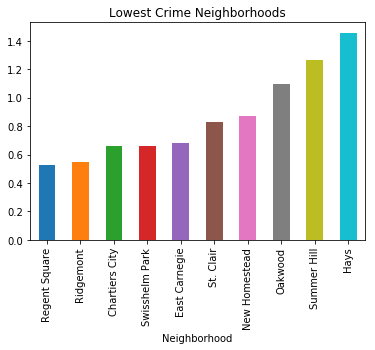

In [18]:
import pandas as pd

neighborhoods = pd.read_csv("Neighborhoods.csv")
hoodsdict = neighborhoods['hood'].value_counts().to_dict()
neighborhoods.set_index('hood')
#print(neighborhoods[neighborhoods.hood == "West End"]['sqmiles'])

fire = pd.read_csv("fire-incidents.csv")
firedict = fire['neighborhood'].value_counts().to_dict()

arrest = pd.read_csv("arrest-data.csv")
arrestdict = arrest['INCIDENTNEIGHBORHOOD'].value_counts().to_dict()

policeblotter = pd.read_csv("police-blotter.csv")
policedict = policeblotter['INCIDENTNEIGHBORHOOD'].value_counts().to_dict()

scores = hoodsdict

#this section of for loops cleans the data to make sure all of the neighborhoods have the same name for every dataset
for key in arrestdict:
    if key == 'Mt. Oliver Neighborhood':
        arrestdict['Mt. Oliver'] = arrestdict.pop(key)
        break
        
for key in arrestdict:
    if key == 'Mount Oliver':
        arrestdict['Mt. Oliver'] = arrestdict['Mt. Oliver'] + arrestdict.pop(key)
        break
        
for key in policedict:
    if key == 'Mount Oliver':
        policedict['Mt. Oliver'] = policedict.pop(key)
        
for key in policedict:
    if key == 'Central North Side':
        policedict['Central Northside'] = policedict.pop(key)

#combines single neighborhoods that were separated into one neighborhood
arrestdict['Troy Hill'] = arrestdict['Troy Hill'] + arrestdict.pop('Troy Hill-Herrs Island')
arrestdict['Central Business District'] = arrestdict['Central Business District'] + arrestdict.pop('Golden Triangle/Civic Arena')

#this section of for loops finds each instance of each neighborhood in a dataset and adds its value to the overall score
for key in firedict:
    if key in scores:
        scores[key] = scores[key] + firedict[key]

for key in arrestdict:
    if key in scores:
        scores[key] = scores[key] + arrestdict[key]

for key in policedict:
    if key in scores:
        scores[key] = scores[key] + policedict[key]
array = list(scores.values())
array.sort(reverse=True)
ratio = 50/array[0]

for key in scores:
    scores[key] = scores[key] * ratio
s = pd.Series(scores, name="Score")
s.index.name = "Neighborhood"
s.sort_values().iloc[0:10].plot('bar', title = "Lowest Crime Neighborhoods") #sorts the scores by lowest first, then plots the lowest 10 onto a bar graph

## More Code

In this next part of code, we basically did the same thing with the smart trash cans, and the data set that contains a list of organizations in the neighborhood dedicated to keeping it clean.
It went through the same process of 'cleaning' the names up, then giving them their scores by looping through the data sets looking for the keys to add a point.
Then, again, it was graphed and displayed to show the ten highest scoring neighborhoods for the cleanliness aspect.

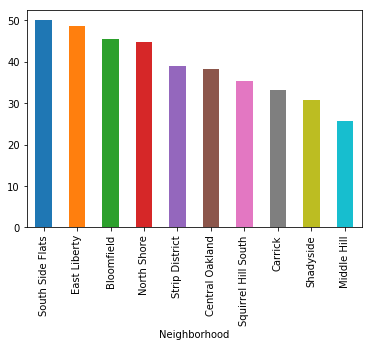

In [19]:
neighborhoods = pd.read_csv("Neighborhoods.csv")
hoodsDict = neighborhoods['hood'].value_counts().to_dict()
neighborhoods.set_index('hood')
smartTrash = pd.read_csv("smart-trash.csv")
smartTrashDict = smartTrash['neighborhood'].value_counts().to_dict()

beauty = pd.read_csv("BeautifyBurgh.csv")
beautyDict = beauty['Neighborhood'].value_counts().to_dict()

scoresBeauty = hoodsDict

#this section of for loops cleans the data to make sure all of the neighborhoods have the same name for every dataset
for key in beautyDict:
    if key.startswith('North Point'):
        beautyDict['Point Breeze'] = beautyDict.pop(key)
        break

#this section of for loops finds each instance of each neighborhood in a dataset and adds its value to the overall score
for key in smartTrashDict:
    if key in scoresBeauty:
        scoresBeauty[key] = scoresBeauty[key] + smartTrashDict[key]

for key in beautyDict:
    if key in scoresBeauty:
        scoresBeauty[key] = scoresBeauty[key] + beautyDict[key]

array = list(scoresBeauty.values())
array.sort(reverse=True)
ratio = 50/array[0]

for key in scoresBeauty:
    scoresBeauty[key] = scoresBeauty[key] * ratio
    
s = pd.Series(scoresBeauty, name="Score")
s.index.name = "Neighborhood"
s.sort_values(ascending = False).iloc[0:10].plot('bar') #sorts the scores by highest first, then plots the top 10 onto a bar graph

## Final Code

In this final part, we make the scores 50 as a base line, then add points if they had the beauty programs, and subtracted their score from the safety incidents.
In the end, we displayed it using a final bar graph that highlights the actual best scores. 

Neighborhood
North Shore              84.202166
Strip District           82.330407
Bloomfield               81.891678
Central Oakland          80.251942
East Liberty             75.241481
Squirrel Hill South      72.505620
Lower Lawrenceville      68.859195
Shadyside                66.126394
Central Lawrenceville    64.888941
Middle Hill              62.871125
Name: Score, dtype: float64

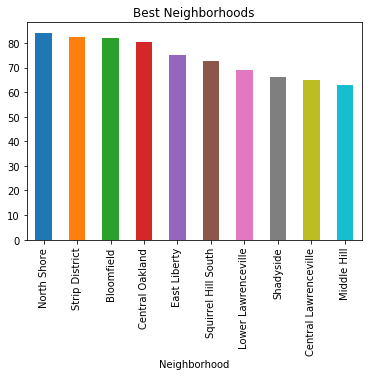

In [20]:
totalScores = scores
for key in scores:
    totalScores[key] = 50 + scoresBeauty[key] - scores[key]

s = pd.Series(totalScores, name="Score")
s.index.name = "Neighborhood"
isSorted = s.sort_values(ascending = False)
isSorted.iloc[0:10].plot('bar', title = "Best Neighborhoods")
isSorted.head(10)

<h2>Conclusion</h2>

According to our data, the best neighborhood is the North Shore with a score of about 84 points.
![North Shore](http://www.post-gazette.com/image/2015/10/08/ca6,0,2210,1160/92l00kmt-JPG-1.JPG)
The runner-up is the Strip District, with about 82 points.
![Strip District](http://www.seriouseats.com/images/2016/03/20160229-pittsburgh-adam-milliron-3.jpg)